In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
# from statsmodels.formula.api import ols
import statsmodels.api as sm
pd.set_option('display.max_columns', 0)

In [2]:
df = pd.read_csv('kc_house_data_train.csv', index_col=0)

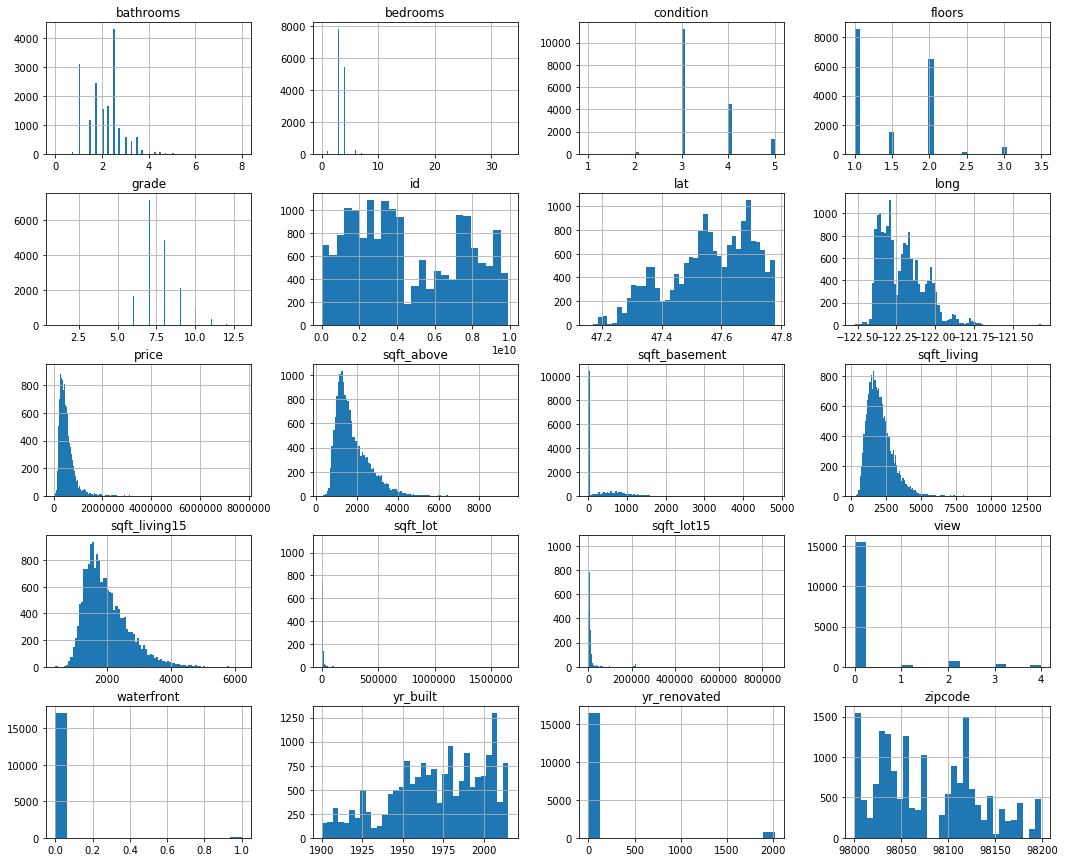

In [3]:
# Create histograms for all variables in the dataset (uniform or not?)
df.hist(figsize=(18,15), bins='auto');

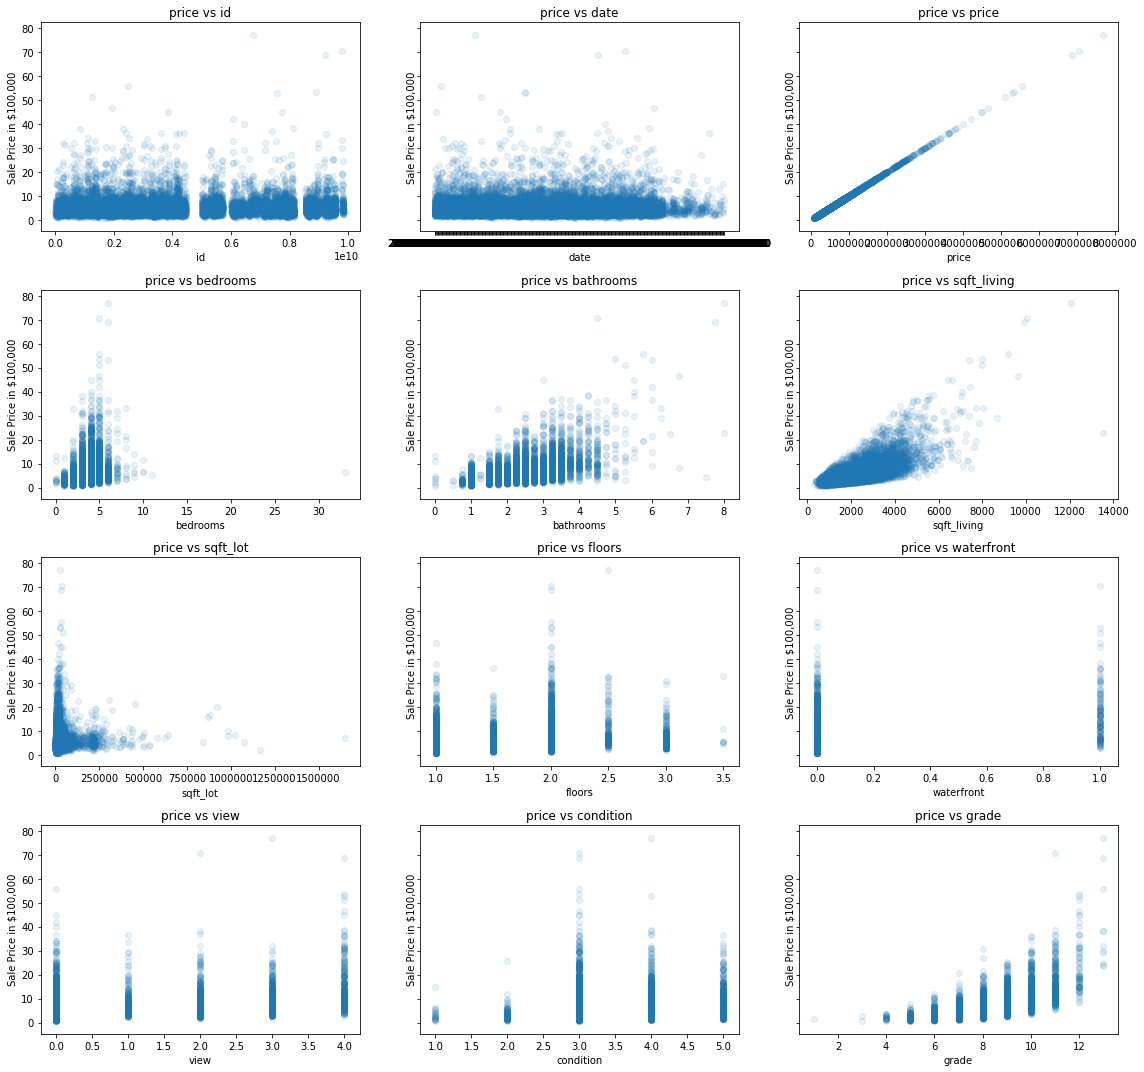

In [4]:
# Check the linearity assumption for all chosen features with target variable using scatter

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), df.columns):
    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')

fig.tight_layout()

King Co. Housing DataSet - Regression Analysis and Diagnostics for price~bedrooms
-------------------------------------------------------------------------------------


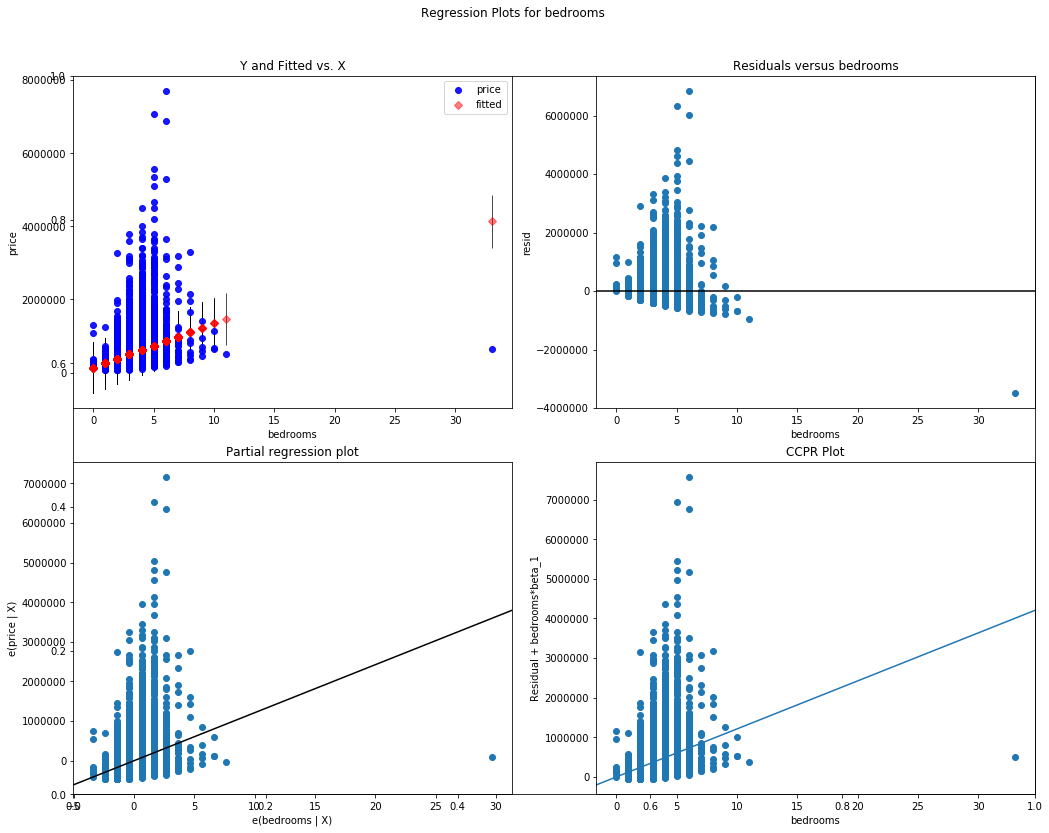

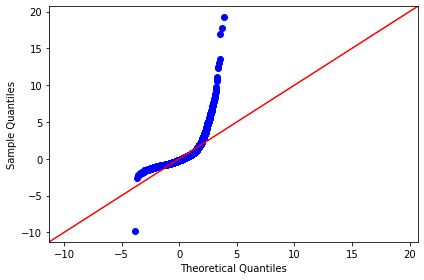

King Co. Housing DataSet - Regression Analysis and Diagnostics for price~bathrooms
-------------------------------------------------------------------------------------


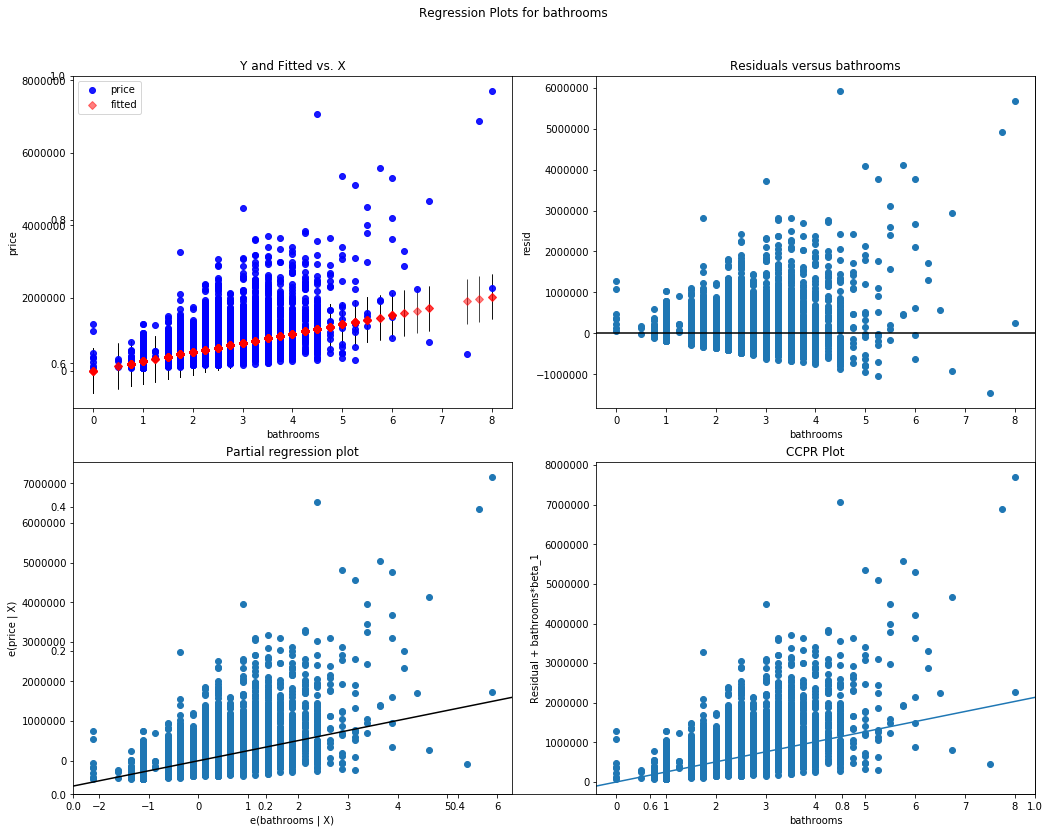

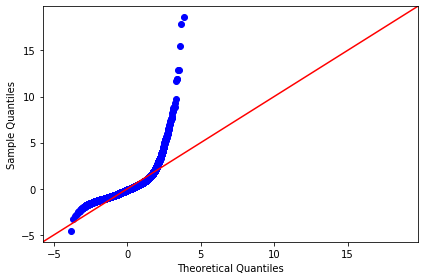

King Co. Housing DataSet - Regression Analysis and Diagnostics for price~sqft_living
-------------------------------------------------------------------------------------


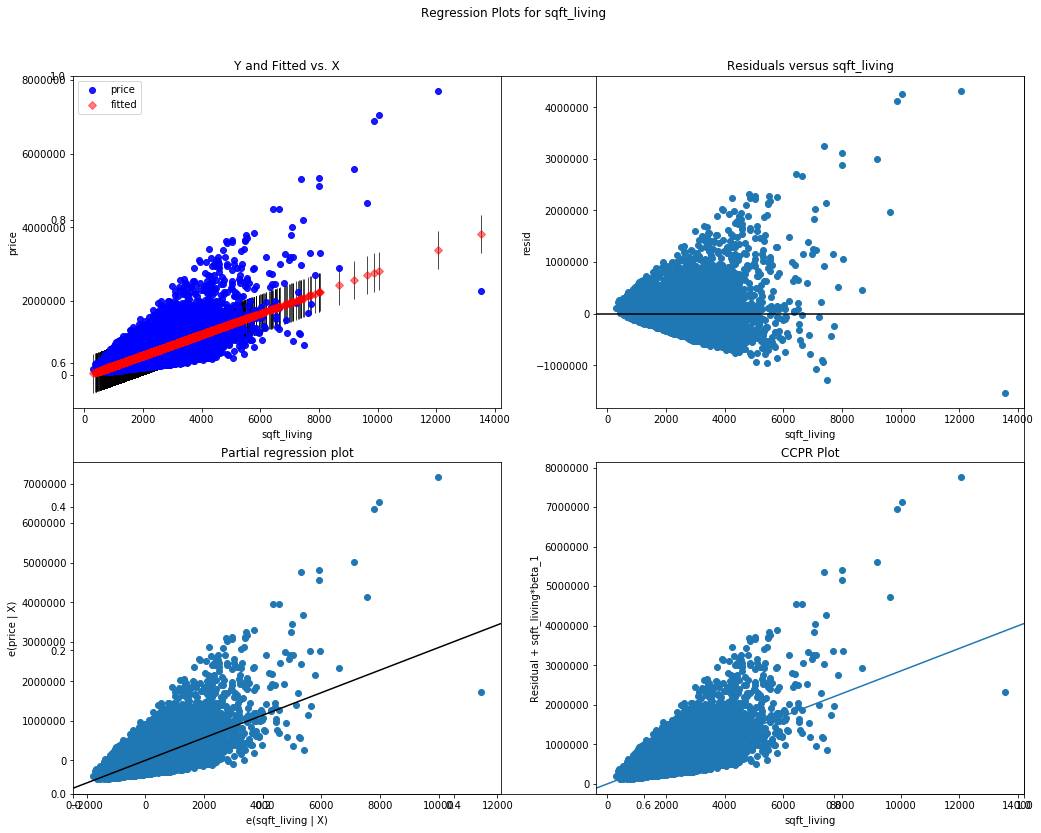

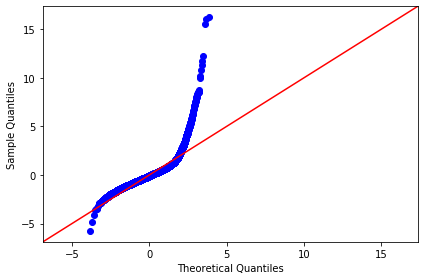

King Co. Housing DataSet - Regression Analysis and Diagnostics for price~sqft_lot
-------------------------------------------------------------------------------------


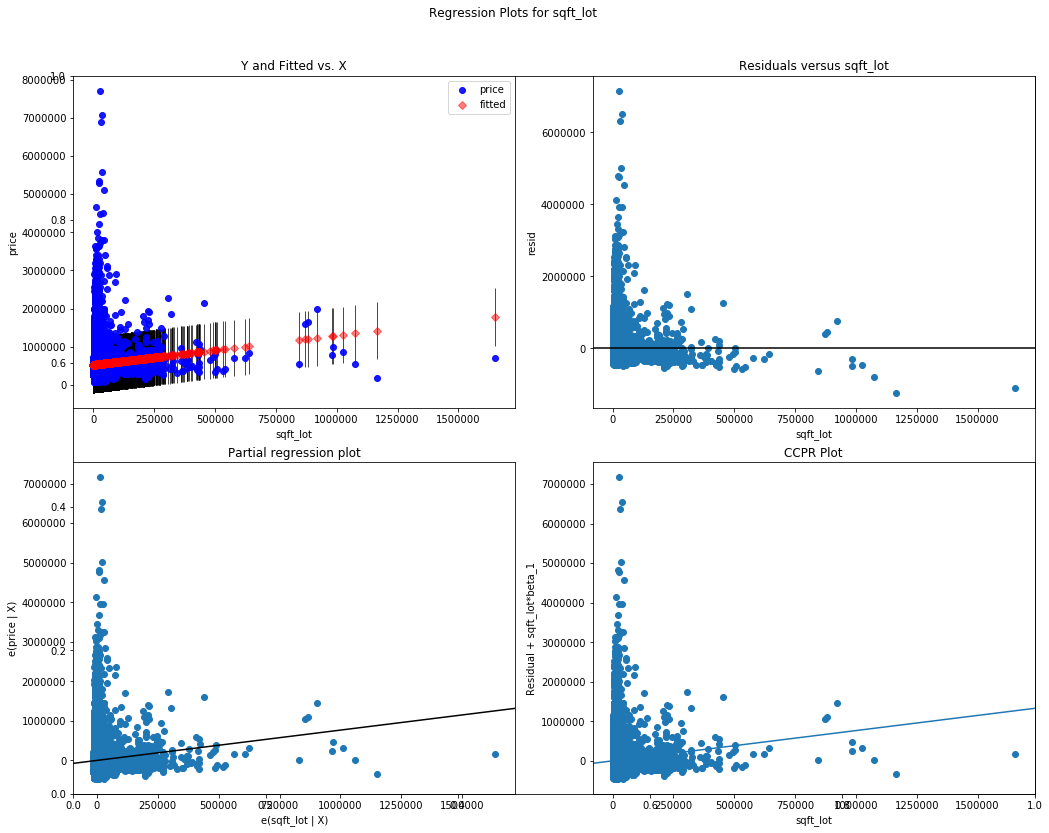

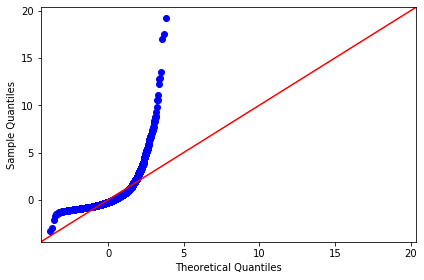

King Co. Housing DataSet - Regression Analysis and Diagnostics for price~floors
-------------------------------------------------------------------------------------


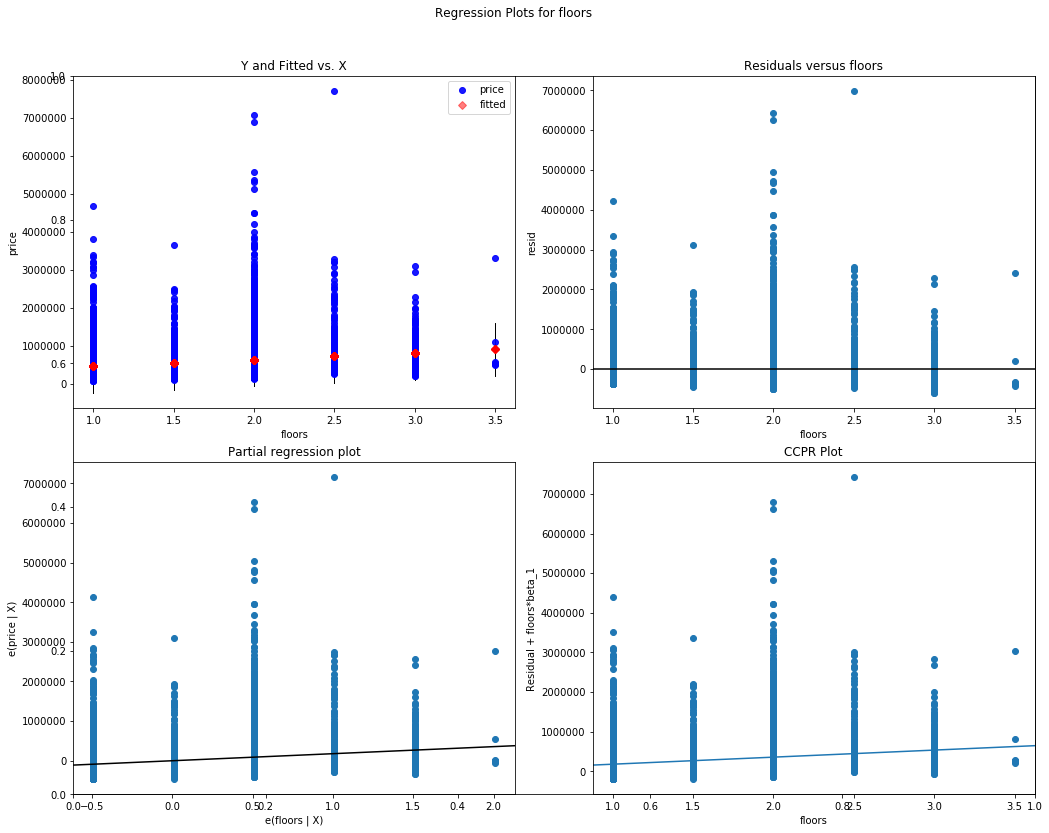

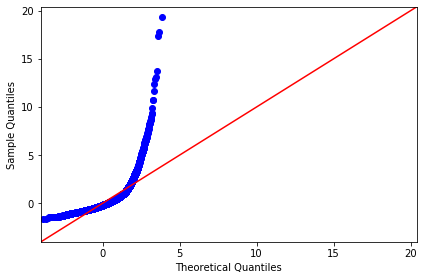

King Co. Housing DataSet - Regression Analysis and Diagnostics for price~waterfront
-------------------------------------------------------------------------------------


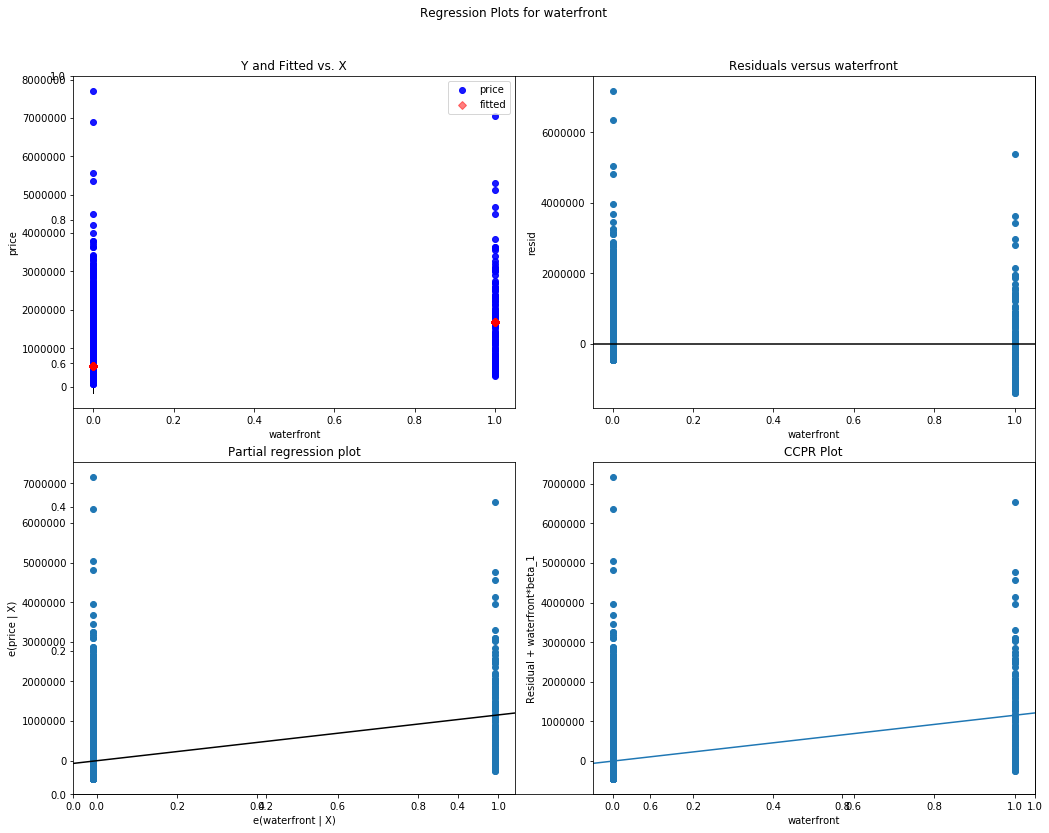

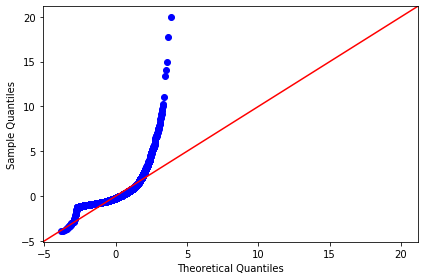

King Co. Housing DataSet - Regression Analysis and Diagnostics for price~view
-------------------------------------------------------------------------------------


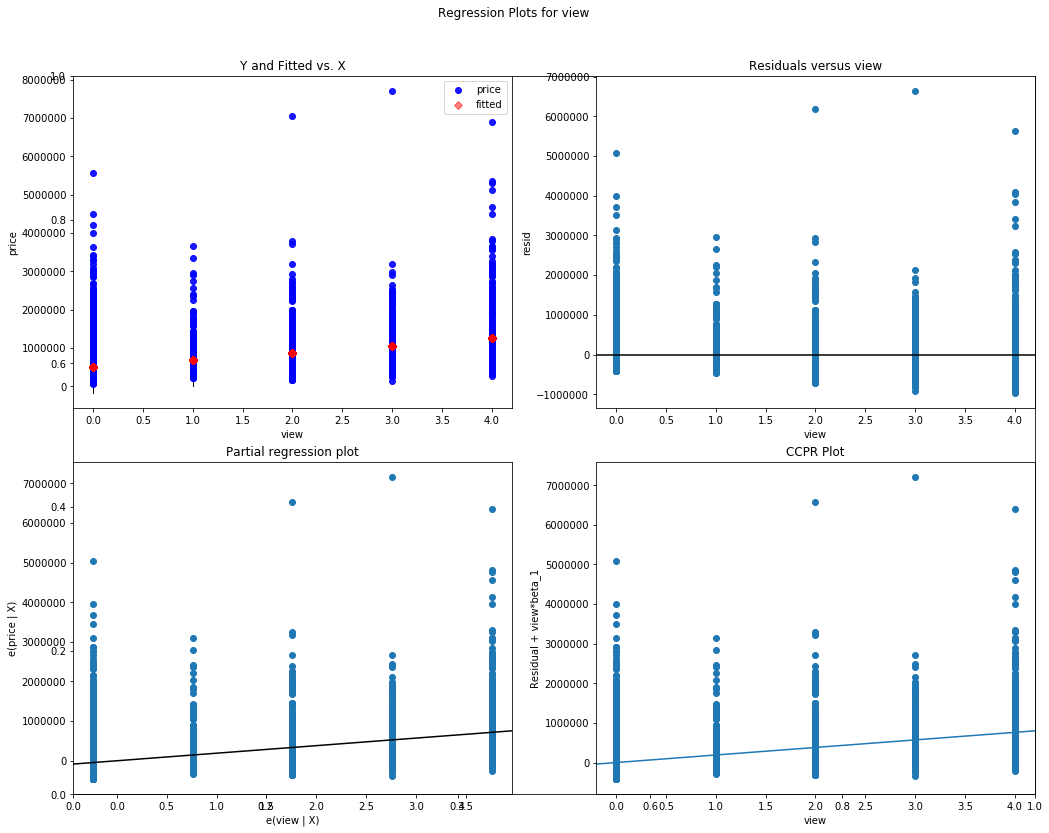

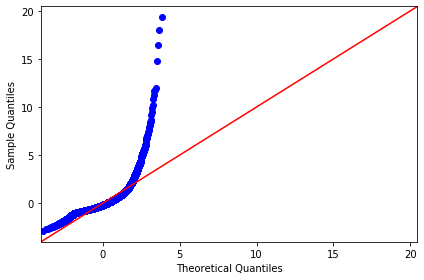

King Co. Housing DataSet - Regression Analysis and Diagnostics for price~condition
-------------------------------------------------------------------------------------


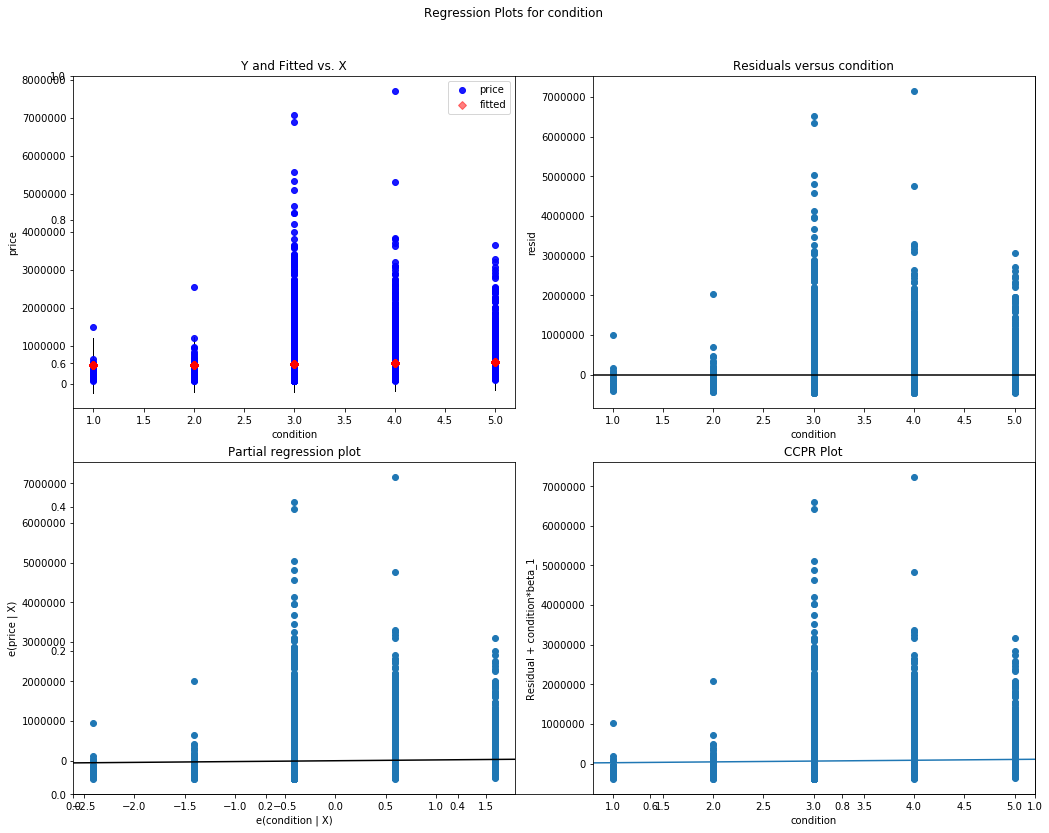

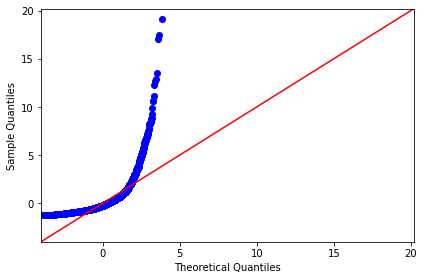

King Co. Housing DataSet - Regression Analysis and Diagnostics for price~grade
-------------------------------------------------------------------------------------


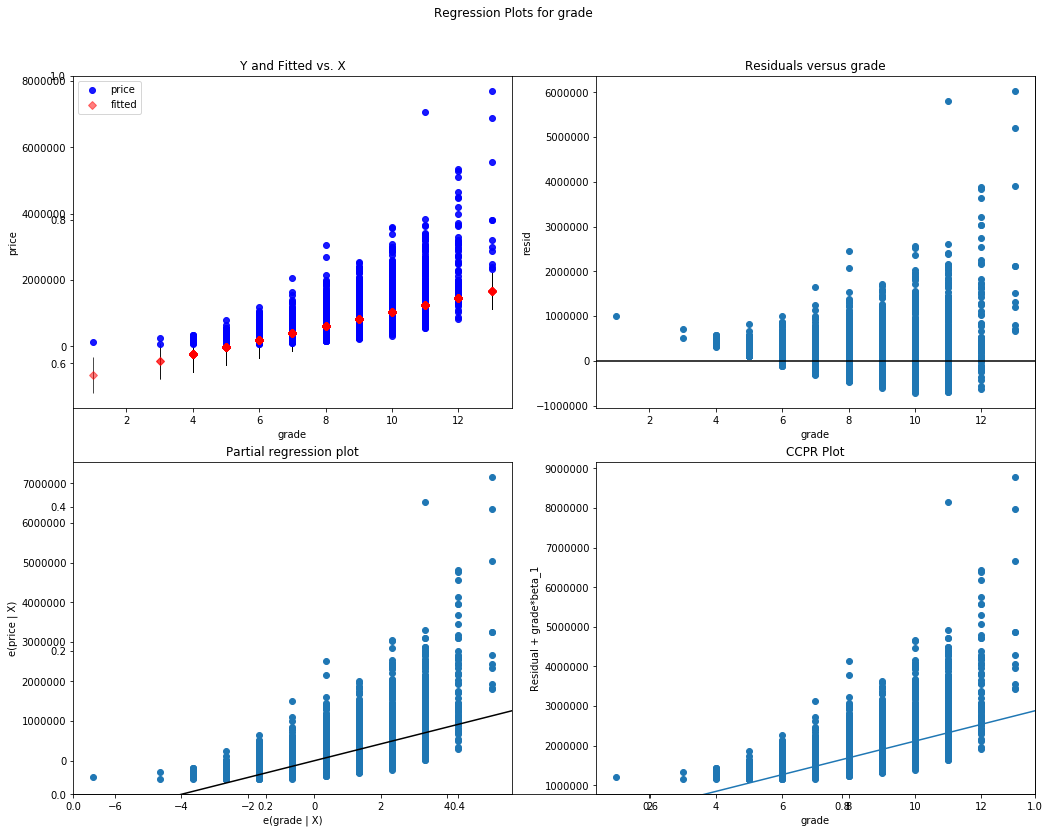

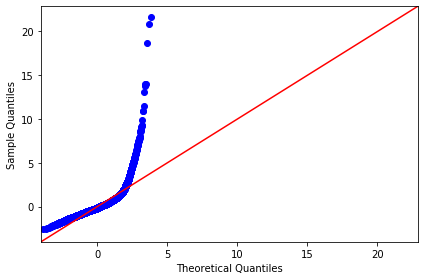

King Co. Housing DataSet - Regression Analysis and Diagnostics for price~sqft_above
-------------------------------------------------------------------------------------


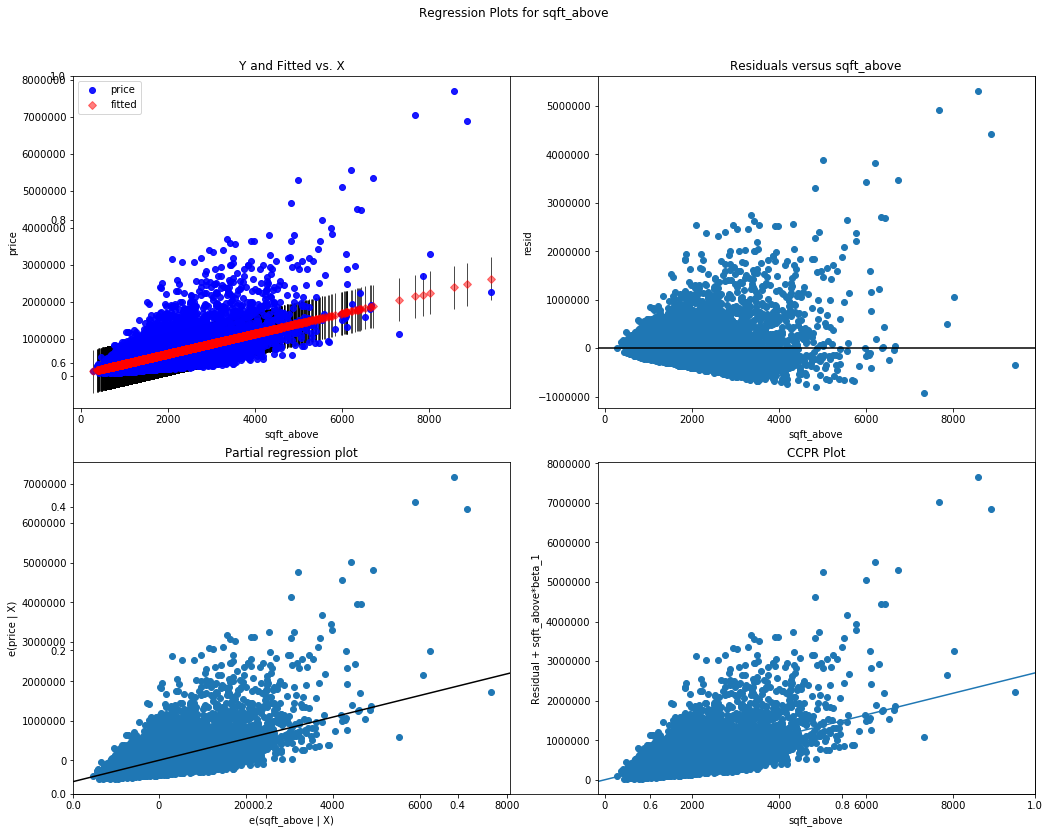

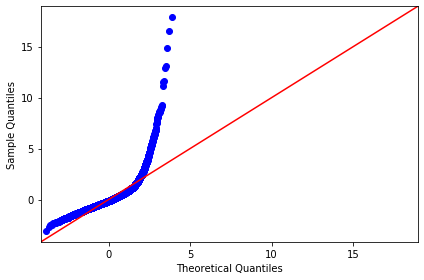

King Co. Housing DataSet - Regression Analysis and Diagnostics for price~sqft_basement
-------------------------------------------------------------------------------------


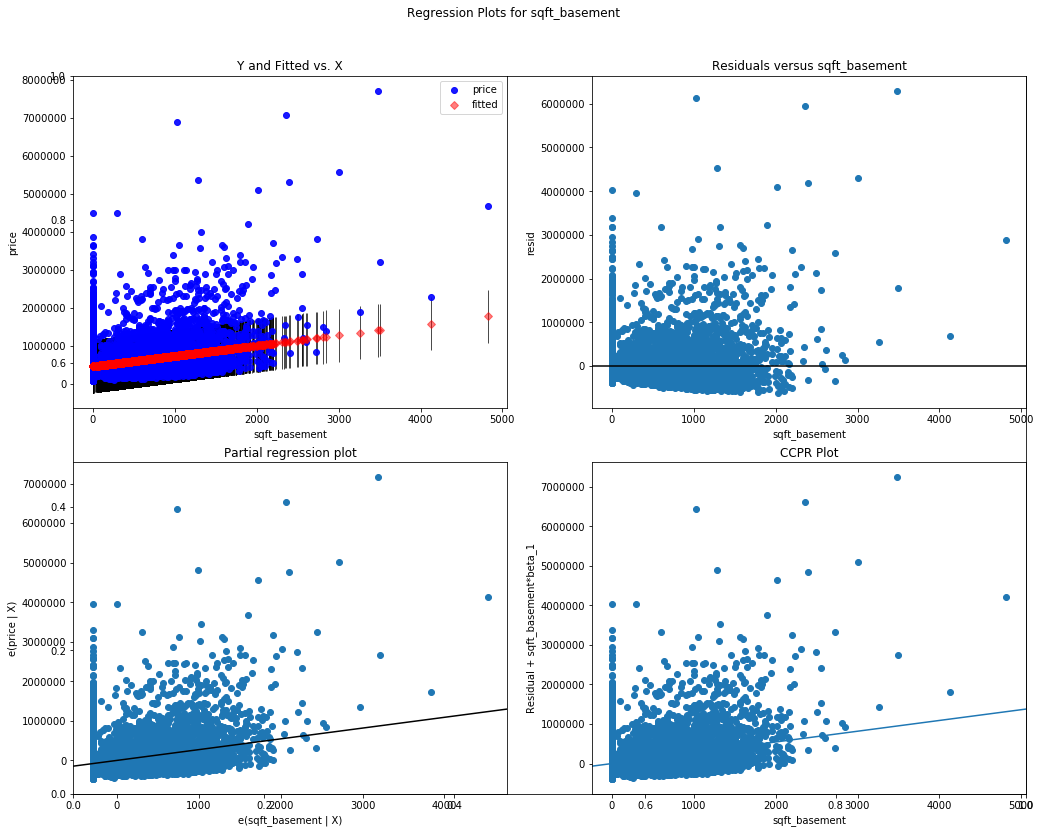

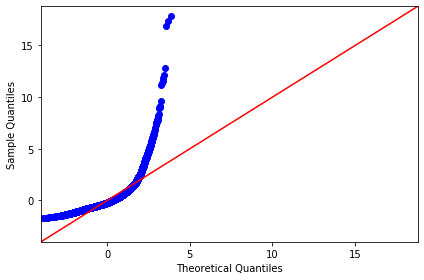

King Co. Housing DataSet - Regression Analysis and Diagnostics for price~yr_built
-------------------------------------------------------------------------------------


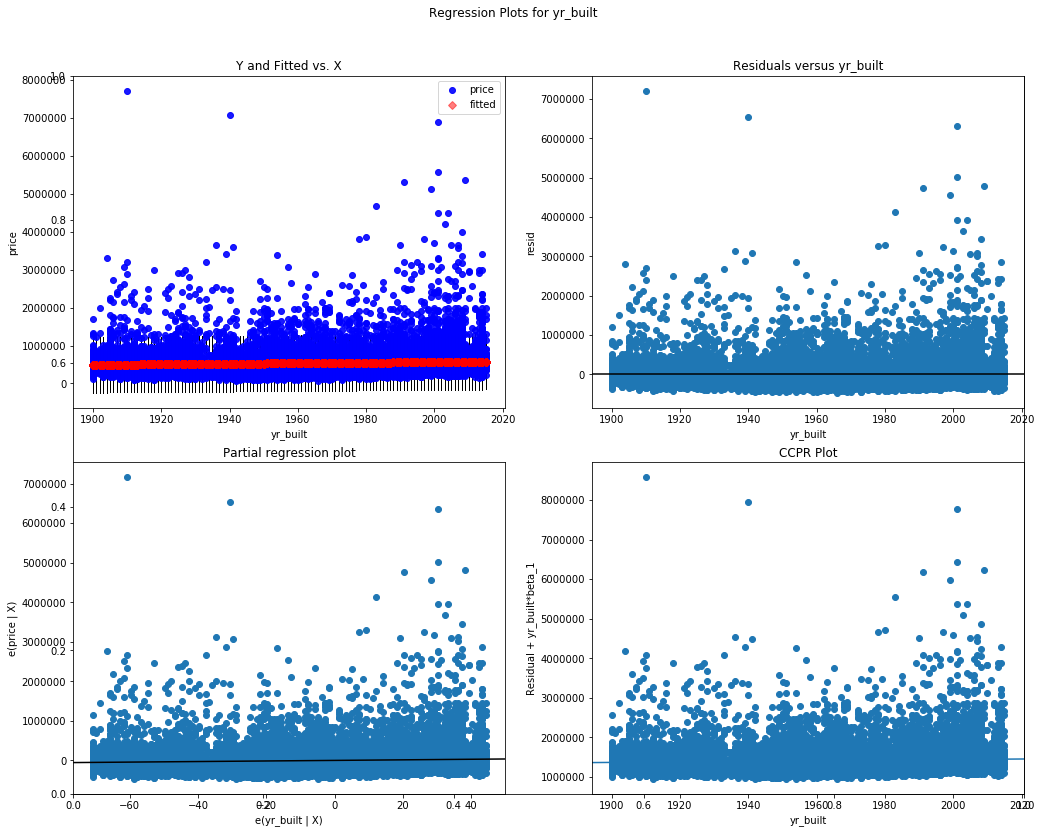

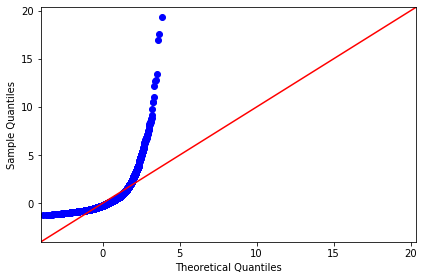

King Co. Housing DataSet - Regression Analysis and Diagnostics for price~yr_renovated
-------------------------------------------------------------------------------------


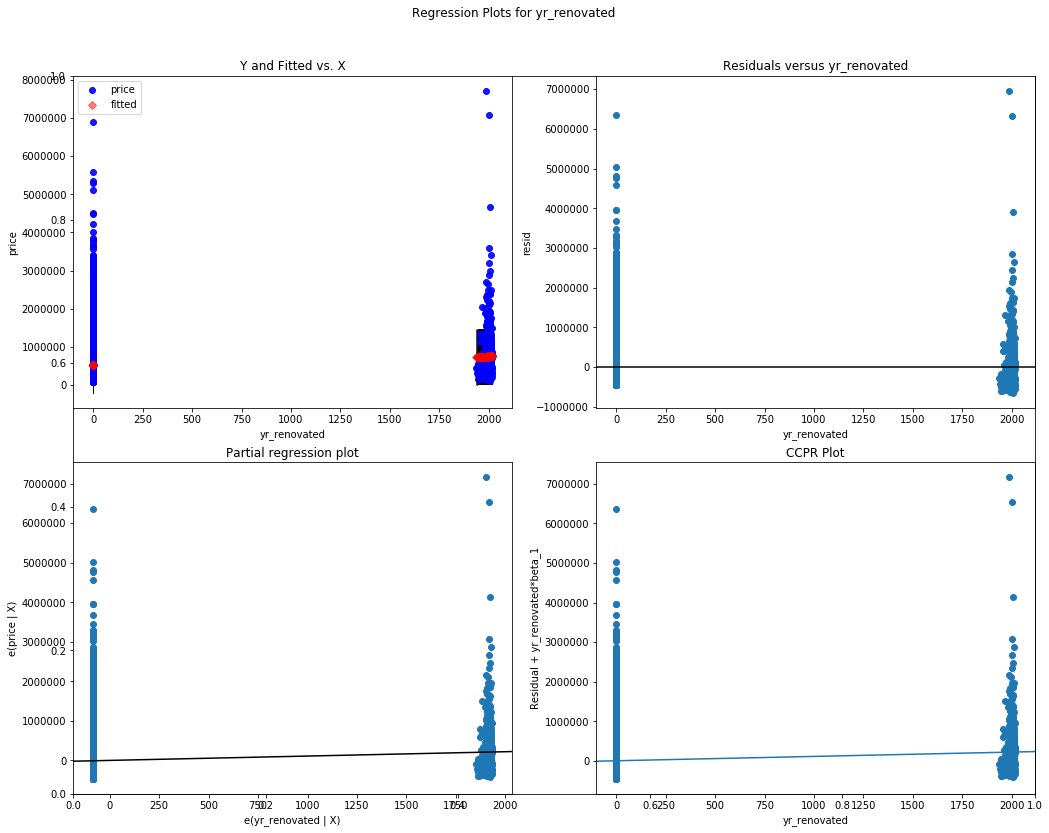

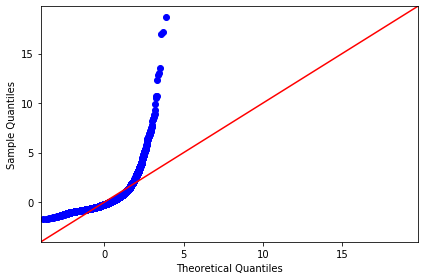

King Co. Housing DataSet - Regression Analysis and Diagnostics for price~zipcode
-------------------------------------------------------------------------------------


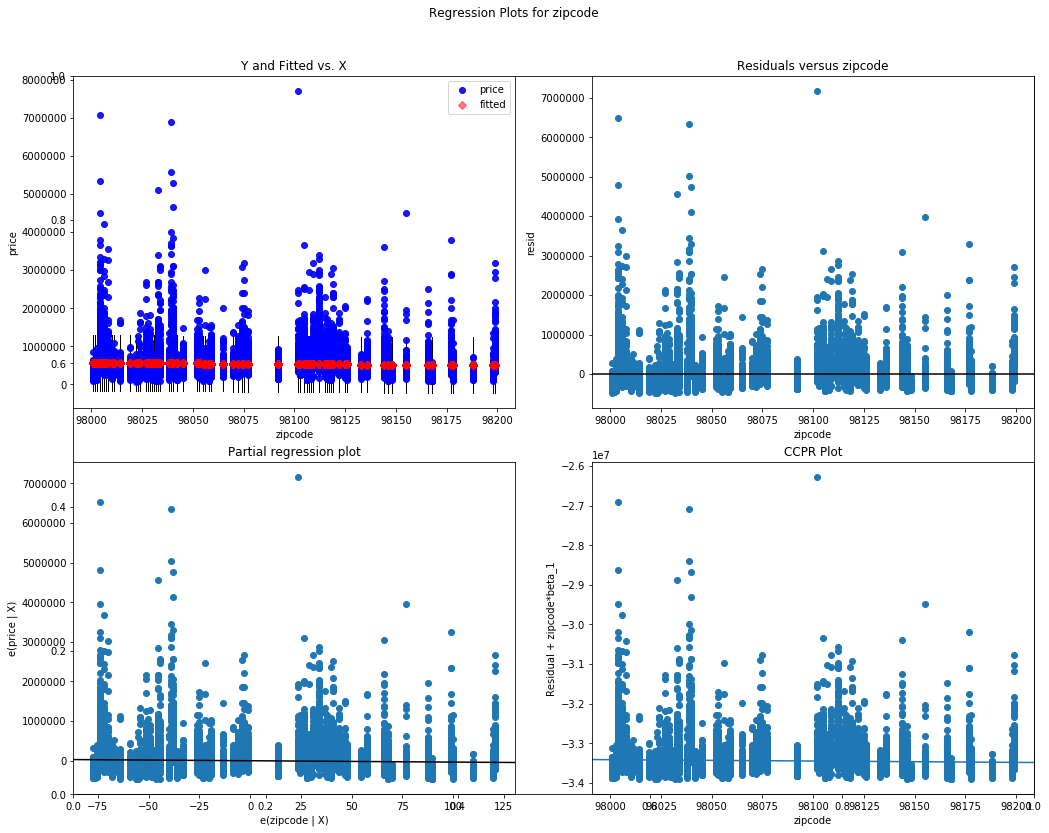

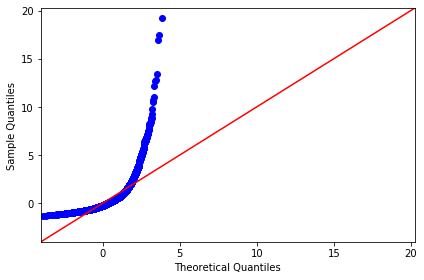

King Co. Housing DataSet - Regression Analysis and Diagnostics for price~lat
-------------------------------------------------------------------------------------


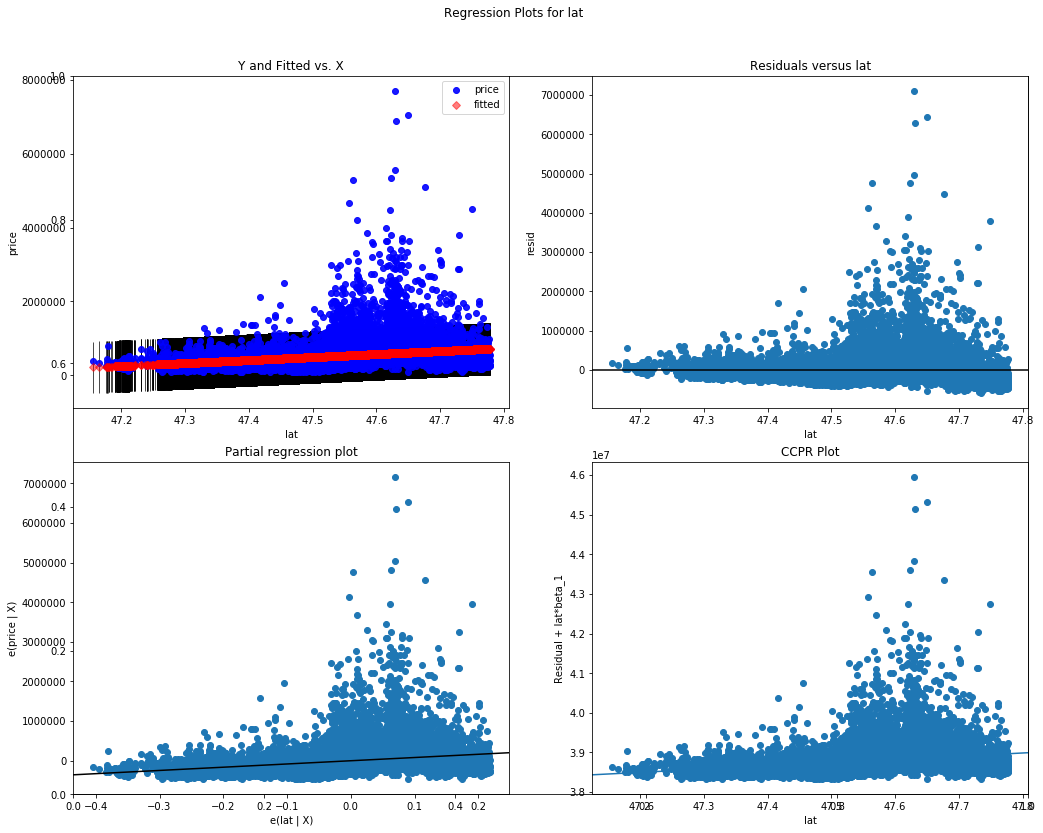

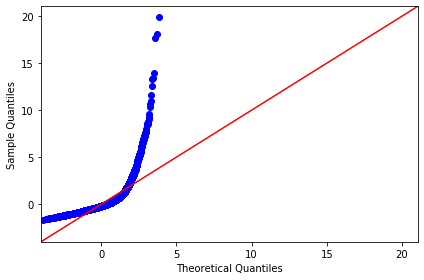

King Co. Housing DataSet - Regression Analysis and Diagnostics for price~long
-------------------------------------------------------------------------------------


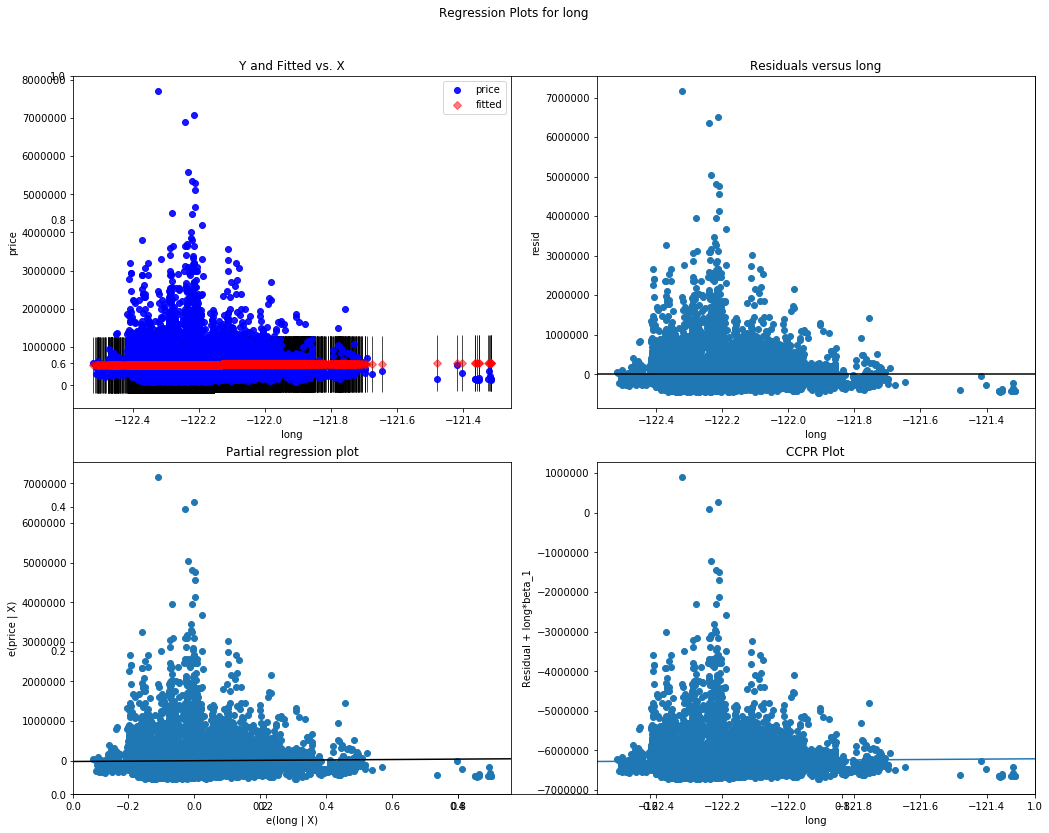

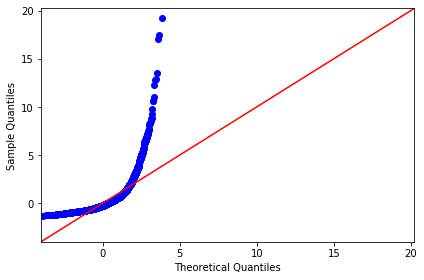

King Co. Housing DataSet - Regression Analysis and Diagnostics for price~sqft_living15
-------------------------------------------------------------------------------------


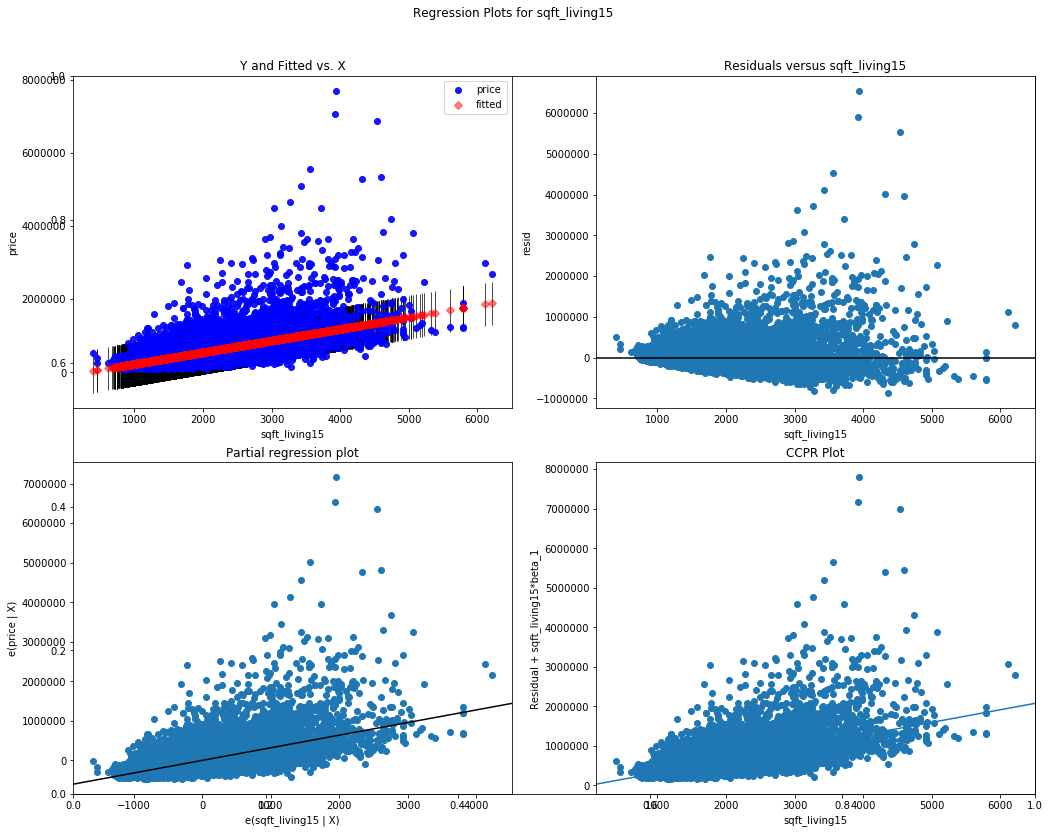

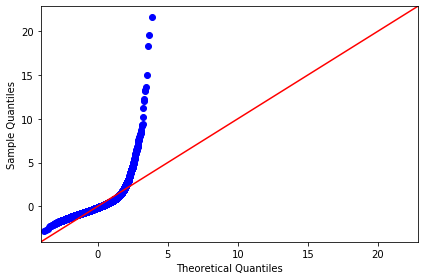

King Co. Housing DataSet - Regression Analysis and Diagnostics for price~sqft_lot15
-------------------------------------------------------------------------------------


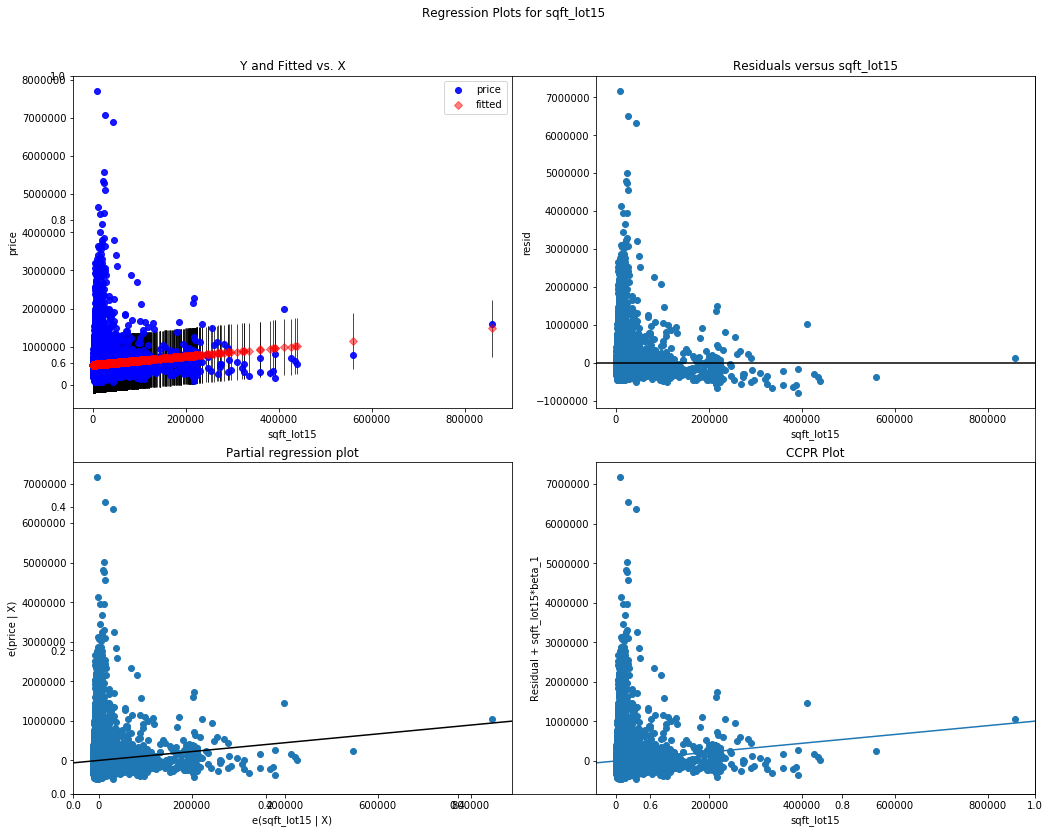

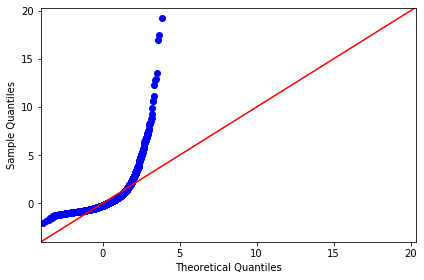

In [5]:
results = []
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
           'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
           'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

for idx, column in enumerate(features):
    print (f"King Co. Housing DataSet - Regression Analysis and Diagnostics for price~{column}")
    print ("-------------------------------------------------------------------------------------")

    f = f'price~{column}'
    model = smf.ols(formula=f, data=df).fit()
    
    fig, axes = plt.subplots(figsize=(15,12))
    fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    fig.tight_layout()
    plt.show()
    
    results.append([column, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]])
#     input("Press Enter to continue...")

In [6]:
pd.DataFrame(results, columns=['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ])

,ind_var,r_squared,intercept,slope,p-value,normality (JB)
0,bedrooms,0.093089,1.318057e+05,1.212565e+05,0.000000e+00,1.179535e+06
1,bathrooms,0.274927,4.187866e+03,2.540559e+05,0.000000e+00,8.585833e+05
2,sqft_living,0.494969,-5.347257e+04,2.854779e+02,0.000000e+00,5.078395e+05
3,sqft_lot,0.007535,5.290631e+05,7.659978e-01,2.807373e-30,1.136281e+06
4,floors,0.066041,2.754320e+05,1.780214e+05,7.675144e-259,1.241501e+06
5,waterfront,0.076054,5.315051e+05,1.156981e+06,2.465038e-299,9.382427e+05
6,view,0.156408,4.953136e+05,1.904496e+05,0.000000e+00,1.032332e+06
7,condition,0.001303,4.702120e+05,2.069165e+04,2.055467e-06,1.126871e+06
8,grade,0.443842,-1.079851e+06,2.117194e+05,0.000000e+00,2.005580e+06
9,sqft_above,0.369372,5.118263e+04,2.736016e+02,0.000000e+00,6.990400e+05


In [7]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

In [9]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.015644,-0.000143,0.003833,-0.014251,-0.129837,0.017126,0.000101,0.012594,-0.014272,0.003163,-0.013932,-0.003516,0.013697,-0.019560,-0.008166,-0.001865,0.017388,-0.007494,-0.139605
price,-0.015644,1.000000,0.313775,0.524335,0.703540,0.086803,0.256985,0.275779,0.395485,0.036099,0.666215,0.607760,0.323312,0.056450,0.117770,-0.048958,0.302394,0.019327,0.585567,0.081423
bedrooms,-0.000143,0.313775,1.000000,0.524033,0.588536,0.030674,0.179908,-0.008668,0.082724,0.021376,0.366405,0.488420,0.307873,0.159936,0.014489,-0.152831,-0.003991,0.129593,0.401073,0.028038
bathrooms,0.003833,0.524335,0.524033,1.000000,0.755270,0.085470,0.497967,0.065848,0.188817,-0.122976,0.664191,0.686853,0.282700,0.507761,0.048140,-0.201527,0.023074,0.221308,0.568080,0.086499
sqft_living,-0.014251,0.703540,0.588536,0.755270,1.000000,0.166810,0.357169,0.109738,0.283336,-0.061530,0.762929,0.876696,0.435529,0.319397,0.051448,-0.195893,0.052646,0.234453,0.755066,0.179570
sqft_lot,-0.129837,0.086803,0.030674,0.085470,0.166810,1.000000,-0.002205,0.015356,0.073058,-0.013715,0.110320,0.180755,0.008065,0.054228,0.004520,-0.126590,-0.082029,0.226190,0.136959,0.701875
floors,0.017126,0.256985,0.179908,0.497967,0.357169,-0.002205,1.000000,0.025132,0.025883,-0.259230,0.458984,0.528509,-0.247481,0.483657,0.005985,-0.060560,0.048227,0.128795,0.283933,-0.008170
waterfront,0.000101,0.275779,-0.008668,0.065848,0.109738,0.015356,0.025132,1.000000,0.407565,0.009608,0.092234,0.077162,0.083433,-0.021981,0.094268,0.034282,-0.013331,-0.042728,0.091090,0.026895
view,0.012594,0.395485,0.082724,0.188817,0.283336,0.073058,0.025883,0.407565,1.000000,0.045060,0.249554,0.164747,0.279939,-0.049593,0.091291,0.089475,0.003820,-0.077572,0.279999,0.073185
condition,-0.014272,0.036099,0.021376,-0.122976,-0.061530,-0.013715,-0.259230,0.009608,0.045060,1.000000,-0.142066,-0.157466,0.166923,-0.358921,-0.060969,0.007068,-0.009927,-0.109200,-0.094307,-0.007125


In [10]:
abs(df.corr()) > 0.75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


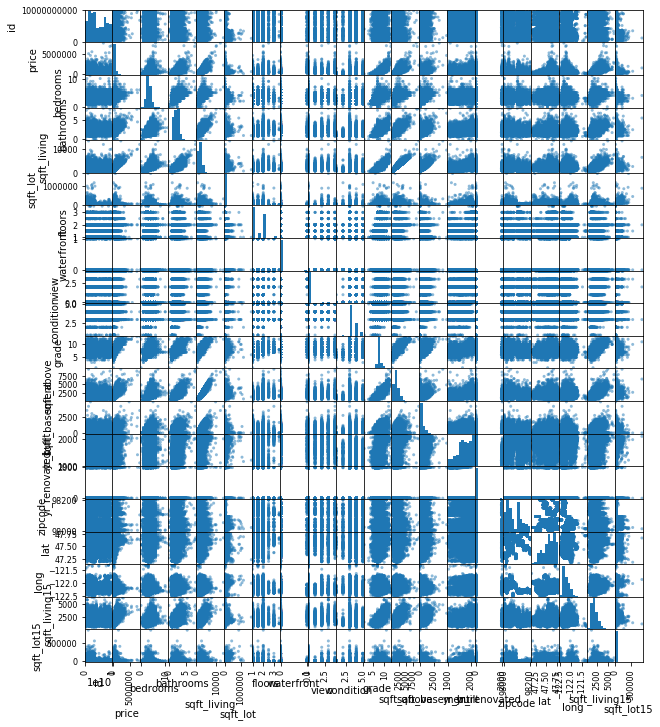

In [11]:
pd.plotting.scatter_matrix(df, figsize=(10,12));

In [12]:
# # Transforming Non-Normal Features

# non_normal = ['long', 'sqft_living', 'sqft_living15']
# for feat in non_normal:
#     df[feat] = df[feat].map(lambda x: np.log(x))
# pd.plotting.scatter_matrix(df, figsize=(10,12));

In [13]:
# statsmodels regression summary report
# lr_model = ols(formula='price~bedrooms+bathrooms++sqft_living', data=df).fit()
# lr_model.summary()

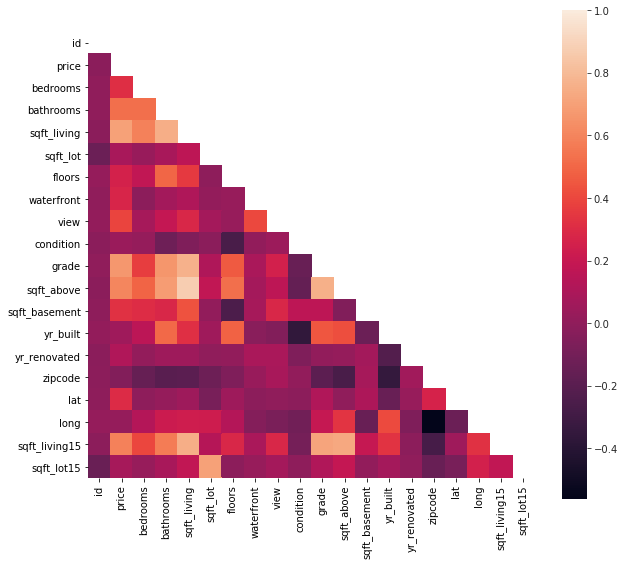

In [14]:
# correlation heatmap
f, ax = plt.subplots(figsize=(10, 9))

# Create an upper triangular matrix to use to get rid of duplicate/
# useless values
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

# plot the heatmap
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr(), mask=mask, square=True)
    
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [16]:
# regression plot (single)
# y = df.price
# x = df['sqft_living']
# sns.regplot(x, y, marker='.')

In [17]:
# # regression plot (multiple)
# y = df.price
# for feature in ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
#                   'waterfront', 'view', 'condition', 'grade', 'sqft_above',
#                   'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
#                   'sqft_living15', 'sqft_lot15', 'sqft_living_relative_to_nabe']:
#     x = df[feature]
#     sns.regplot(x, y, marker='.')
#     plt.show()

In [19]:
# # renovations/prices/time
# y = df.price
# x = df.yr_built
# sns.scatterplot(x, y, marker='.', hue=df.renovated)

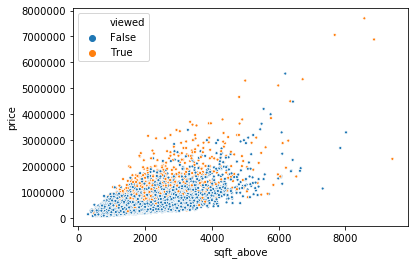

In [21]:
# views/prices/time
y = df.price
x = df.sqft_above
sns.scatterplot(x, y, marker='.', hue=df.viewed)

In [23]:
df.long

0       -122.162
1       -122.285
2       -122.129
3       -122.228
4       -122.083
          ...   
17285   -122.112
17286   -122.288
17287   -122.262
17288   -121.990
17289   -122.319
Name: long, Length: 17290, dtype: float64

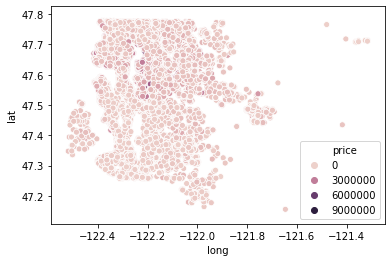

In [24]:
sns.scatterplot(x=df.long, y = df.lat, hue=df.price)

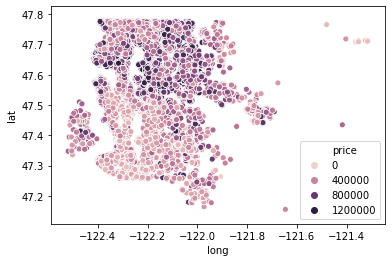

In [25]:
sns.scatterplot(x=df[df.price< 3000000].long, y = df[df.price< 3000000].lat, hue=df[df.price< 1000000].price)

In [26]:
# Get latter of year built/renovated
df['yr_built_or_renovated'] = df['yr_built']#.where(df.yr_built > df.yr_renovated, df.yr_renovated).head(50)
df['yr_built_or_renovated'].where(df.yr_built > df.yr_renovated, df.yr_renovated, inplace=True)

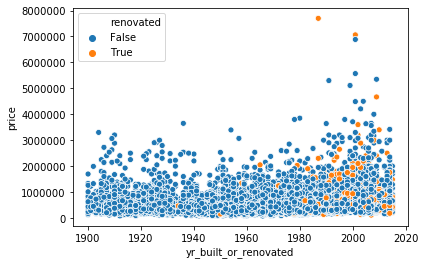

In [27]:
# How do scatter plots/regression plots compare for yr_built and yr_built_or_renovated
sns.scatterplot(df.yr_built_or_renovated, df.price, hue=df.renovated)

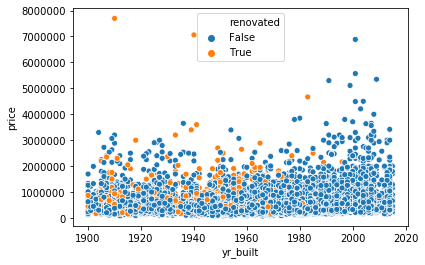

In [28]:
sns.scatterplot(df.yr_built, df.price, hue=df.renovated)

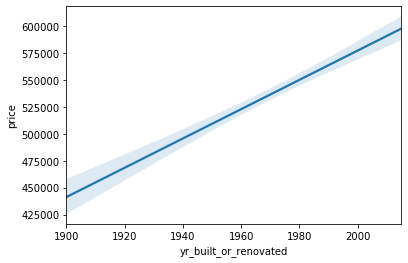

In [29]:
sns.regplot(df.yr_built_or_renovated, df.price, scatter=False)

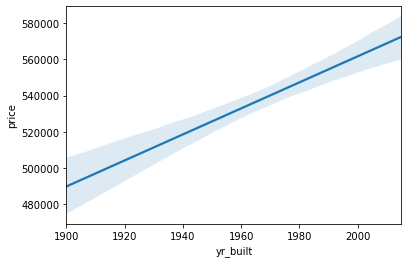

In [30]:
sns.regplot(df.yr_built, df.price, scatter=False)

In [31]:
# bin yr_built/renovated by decade
df['decade_built_or_reno'] = df.yr_built_or_renovated.map(lambda x : str(x//10*10)+'s')

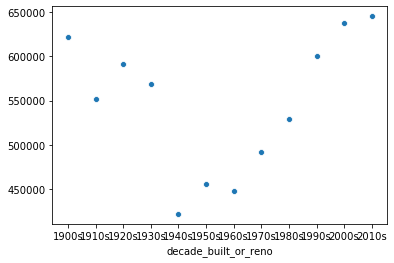

In [32]:
#non-linear relatioship btwn decade_built/reno and price
x = df.groupby('decade_built_or_reno').price.mean().index
y = df.groupby('decade_built_or_reno').price.mean().values

sns.scatterplot(x, y)

In [33]:
# Add dummy vars and drop decade_built/reno
df = df.merge(pd.get_dummies(df.decade_built_or_reno), left_index=True, right_index=True)
df.drop(columns='decade_built_or_reno', inplace=True)

In [34]:
# simple/multiple linear regression for selected feature(s)

# features=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition',
#           'grade', 'sqft_above', 'sqft_basement']

features=['sqft_living', 'grade']
df_features = df[features]
target = df['price']
lm = LinearRegression()
lm = lm.fit(df_features, target)

#access output
print(lm.intercept_)
print(lm.coef_)
print("R^2: ", lm.score(df_features, target))

-607385.0083227494
[  189.58151537 98442.06327133]
R^2:  0.5350724052591719


In [35]:
# Compare SLR for multiple features
target = df['price']
features=['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'viewed', 'sq_ft_per_flr']

for feature in features:
    df_feature = df[[feature]]
    
    lm = LinearRegression()
    lm = lm.fit(df_feature, target)

    #access output
    print(feature)
    print(f'intercept: {lm.intercept_}')
    print(f'coef: {lm.coef_}')
    print(f'R^2: {lm.score(df_feature, target)}')

bathrooms
intercept: 4187.865737913526
coef: [254055.91043232]
R^2: 0.2749267785231909
sqft_living
intercept: -53472.566426478676
coef: [285.47788609]
R^2: 0.4949689593228172
grade
intercept: -1079850.6723174197
coef: [211719.4070072]
R^2: 0.4438423664493838
sqft_above
intercept: 51182.62954395544
coef: [273.60156115]
R^2: 0.3693718443591718
sqft_living15
intercept: -93867.31729613827
coef: [319.22088147]
R^2: 0.3428887937324674
viewed
intercept: 496770.4212317767
coef: [442249.10581884]
R^2: 0.1256612289027006
sq_ft_per_flr
intercept: 81208.28063877329
coef: [370.49715331]
R^2: 0.1982125309654742


bathrooms
Coefficients: 
 [254055.91043232]
Mean squared error: 101045478590.13
Coefficient of determination: 0.27


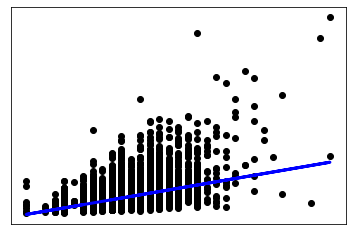

sqft_living
Coefficients: 
 [285.47788609]
Mean squared error: 70380620462.24
Coefficient of determination: 0.49


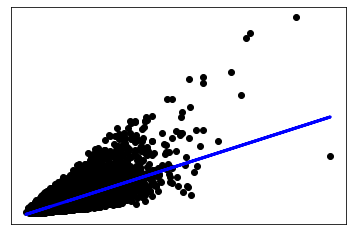

grade
Coefficients: 
 [211719.4070072]
Mean squared error: 77505571284.53
Coefficient of determination: 0.44


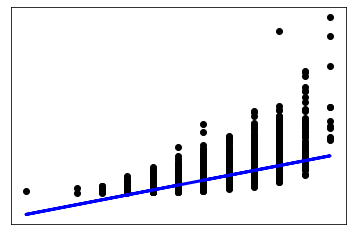

sqft_above
Coefficients: 
 [273.60156115]
Mean squared error: 87883708723.03
Coefficient of determination: 0.37


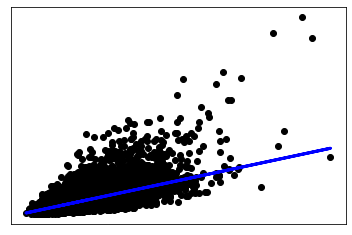

sqft_living15
Coefficients: 
 [319.22088147]
Mean squared error: 91574360157.72
Coefficient of determination: 0.34


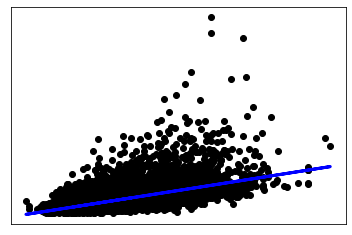

viewed
Coefficients: 
 [442249.10581884]
Mean squared error: 121846976220.53
Coefficient of determination: 0.13


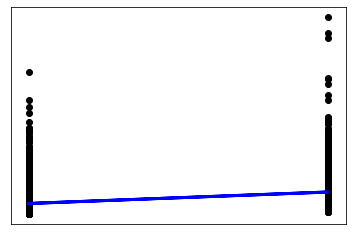

sq_ft_per_flr
Coefficients: 
 [370.49715331]
Mean squared error: 111736299364.56
Coefficient of determination: 0.20


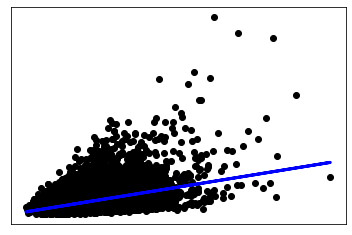

In [36]:
# Compare MSE for multiple SLR models
mse_lst = []

target = df['price']
features = ['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'viewed', 'sq_ft_per_flr']

for feature in features:

    df_features = df[[feature]]


    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(df_features, target)

    # Make predictions using the testing set
    price_pred = regr.predict(df_features)

    # The coefficients
    print(feature)
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print('Mean squared error: %.2f'
          % mean_squared_error(target, price_pred))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'
          % r2_score(target, price_pred))
    mse_lst.append({feature: {'Coefficients': regr.coef_[0], 'MSE': mean_squared_error(target, price_pred), 'CofD': r2_score(target, price_pred)}})

    # Plot outputs
    plt.scatter(df_features, target,  color='black')
    plt.plot(df_features, price_pred, color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())

    plt.show()

In [37]:
mse_lst

[{'bathrooms': {'Coefficients': 254055.9104323226,
   'MSE': 101045478590.12521,
   'CofD': 0.2749267785231909}},
 {'sqft_living': {'Coefficients': 285.4778860892351,
   'MSE': 70380620462.24269,
   'CofD': 0.49496895932281715}},
 {'grade': {'Coefficients': 211719.40700720227,
   'MSE': 77505571284.52843,
   'CofD': 0.4438423664493838}},
 {'sqft_above': {'Coefficients': 273.6015611541951,
   'MSE': 87883708723.028,
   'CofD': 0.3693718443591718}},
 {'sqft_living15': {'Coefficients': 319.22088147313525,
   'MSE': 91574360157.72238,
   'CofD': 0.3428887937324674}},
 {'viewed': {'Coefficients': 442249.1058188371,
   'MSE': 121846976220.53099,
   'CofD': 0.1256612289027006}},
 {'sq_ft_per_flr': {'Coefficients': 370.4971533133792,
   'MSE': 111736299364.56029,
   'CofD': 0.1982125309654742}}]

In [38]:
sorted([feature[list(feature.keys())[0]]['MSE'] for feature in mse_lst])

[70380620462.24269,
 77505571284.52843,
 87883708723.028,
 91574360157.72238,
 101045478590.12521,
 111736299364.56029,
 121846976220.53099]

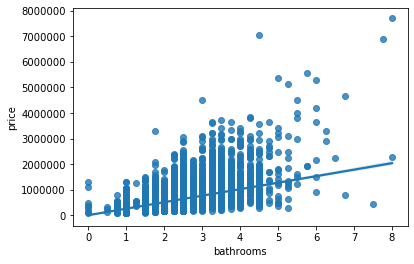

In [39]:
sns.regplot(df.bathrooms, df.price)